## open file

[kaggle data link](https://www.kaggle.com/competitions/spaceship-titanic)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
folder_path = '/content/drive/MyDrive/'
data = os.path.join(folder_path,'kaggle','spaceship-titanic','data')
train = os.path.join(data,'train.csv')
test = os.path.join(data,'test.csv')

In [ ]:
df = pd.read_csv(train)
df.sample(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5253,5606_01,Europa,True,B/213/S,55 Cancri e,45.0,False,0.0,0.0,0.0,0.0,0.0,Algor Paterpad,True
8472,9049_01,Europa,True,C/336/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Luxion Grentual,True
7973,8523_01,Europa,False,C/320/S,55 Cancri e,56.0,False,53.0,3033.0,0.0,140.0,6102.0,Weiaham Vendeck,False


## basic info

In [ ]:
df.shape

(8693, 14)

In [ ]:
import numpy as np
data_raw = pd.read_csv(train)
data_val = pd.read_csv(test)
print(f'Duplicates in train set: {data_raw.duplicated().sum()}, ({np.round(100*data_raw.duplicated().sum()/len(data_raw),1)}%)')
print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*data_val.duplicated().sum()/len(data_val),1)}%)')

Duplicates in train set: 0, (0.0%)
Duplicates in test set: 0, (0.0%)


In [ ]:
df.info()   # feature data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## features name

In [ ]:
cols = df.columns

In [ ]:
cols

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## serial number

PassengerId 乘客號碼  

Takes the form groups-number(within group)
so we need to split to 2 parts.

Cabin 機艙號碼

Takes the form deck/num/side
so we need to split to 3 parts.

Age 年齡

### PassengerId 乘客號碼


In [ ]:
# df.PassengerId.value_counts(normalize=True).round(2) # 每筆資料都不同，需要整理過

In [ ]:
def split_PassengerId(x,n):
  if pd.isna(x):  # 需要考慮空值
    return None
  else:
    return(x.split('_')[n])

df['PassengerId'] >> df['group'] + df['p_num']

df['group'] >> df['group_size'] + df['solo']



In [ ]:
df['group'] = df['PassengerId'].apply(lambda x: split_PassengerId(x,0))
df['p_num'] = df['PassengerId'].apply(lambda x: split_PassengerId(x,1))
df['group_size']=df['group'].map(lambda x: df['group'].value_counts()[x])
df['Solo']=(df['group_size']==1).astype(int)

In [ ]:
df['Solo']=(df['group_size']==1).astype(int)

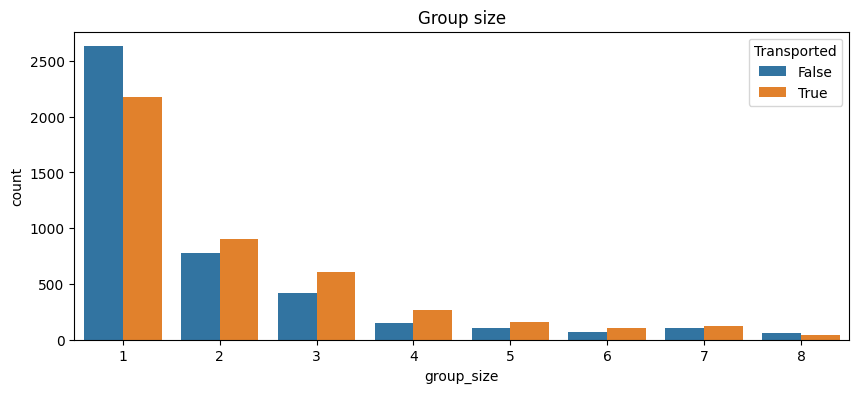

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

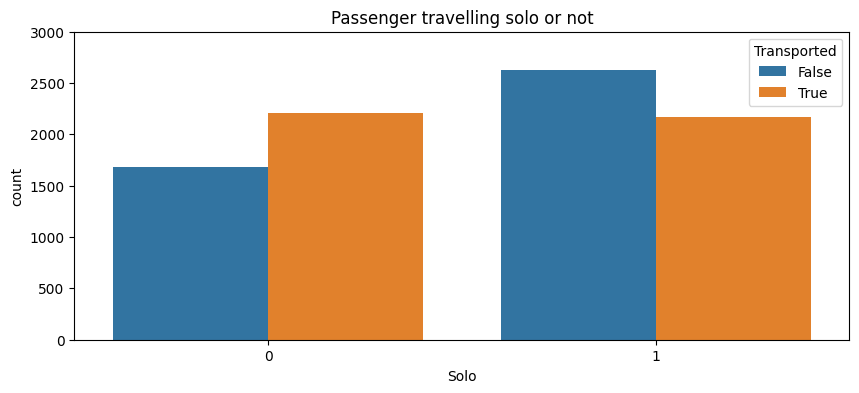

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

### Cabin 機艙號碼

In [ ]:
def split_cabin(x,n):
  if pd.isna(x):  # 需要考慮空值
    return None
  else:
    return(x.split('/')[n])

def turn_int(x):
  if pd.isna(x):  # 需要考慮空值
    return None
  else:
    return(int(x))

In [ ]:
# df.Cabin.value_counts(normalize=True).round(2)   # 每筆資料都不同，需要整理過

In [ ]:
df['deck'] = df['Cabin'].apply(lambda x: split_cabin(x,0))
df['c_num'] = df['Cabin'].apply(lambda x: split_cabin(x,1))
df['side'] = df['Cabin'].apply(lambda x: split_cabin(x,2))
df['c_num'] = df['c_num'].apply(lambda x: turn_int(x))

In [ ]:
df.deck.value_counts(normalize=True).round(2)

F    0.33
G    0.30
E    0.10
B    0.09
C    0.09
D    0.06
A    0.03
T    0.00
Name: deck, dtype: float64

In [ ]:
df.side.value_counts(normalize=True).round(2)

S    0.5
P    0.5
Name: side, dtype: float64

In [ ]:
plt.figure(figsize=(18, 6))   # (width, height)
ax = sns.histplot(df['c_num'], color='b')
# mean = df['num'].mean()
# mode = df['num'].mode().values
# median = df['num'].median()
# ax.axvline(x=mean, color='black', linestyle='--', label=f'mean = {mean}')
# ax.axvline(x=mode, color='g', linestyle='--', label=f'mode = {mode}')
# ax.axvline(x=median, color='r', linestyle='--', label=f'median = {median}')
# ax.legend()
# plt.subplots_adjust(top=1.2)

side & deck

In [ ]:
print(df[df['side']=='S'].deck.value_counts(normalize=True).round(2))
print(df[df['side']=='P'].deck.value_counts(normalize=True).round(2))

F    0.32
G    0.30
E    0.10
B    0.10
C    0.09
D    0.05
A    0.03
T    0.00
Name: deck, dtype: float64
F    0.34
G    0.30
E    0.10
B    0.08
C    0.08
D    0.06
A    0.03
T    0.00
Name: deck, dtype: float64


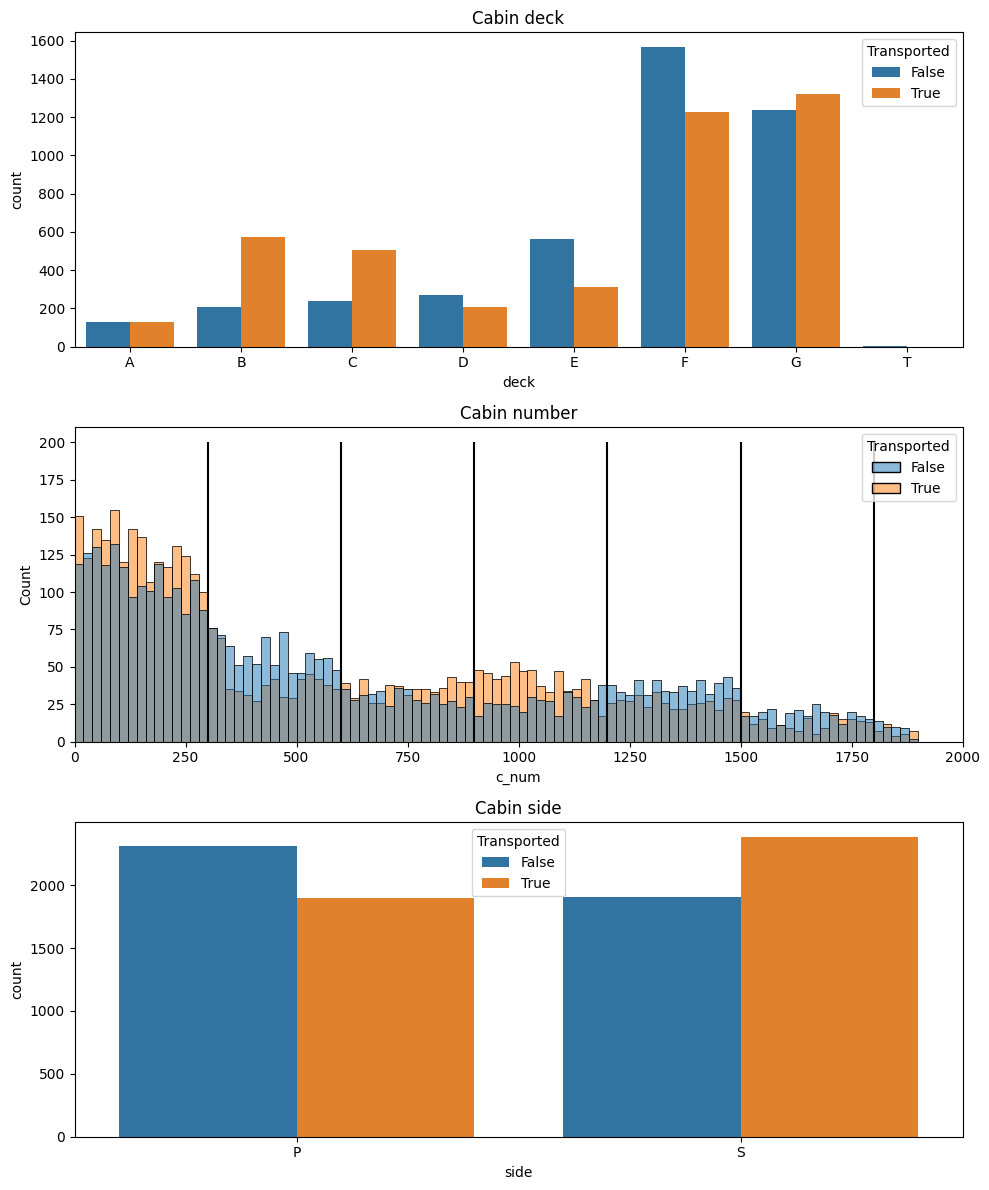

In [ ]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=df, x='deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=df, x='c_num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=df, x='side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

### Age 年齡

In [ ]:
average_age = df['Age'].mean()
mode_age = df['Age'].mode().values
median_age = df['Age'].median()
print("mean : ", average_age)
print("mode : ", mode_age)
print("median : ", median_age)

mean :  28.82793046746535
mode :  [24.]
median :  27.0


In [ ]:
plt.figure(figsize=(18, 6))   # (width, height)
ax = sns.histplot(df['Age'], color='b')
mean = df['Age'].mean()
mode = df['Age'].mode().values
median = df['Age'].median()
ax.axvline(x=mean, color='black', linestyle='--', label=f'mean = {mean}')
ax.axvline(x=mode, color='g', linestyle='--', label=f'mode = {mode}')
ax.axvline(x=median, color='r', linestyle='--', label=f'median = {median}')
ax.legend()
plt.subplots_adjust(top=1.2)

Text(0.5, 1.0, 'Age group distribution')

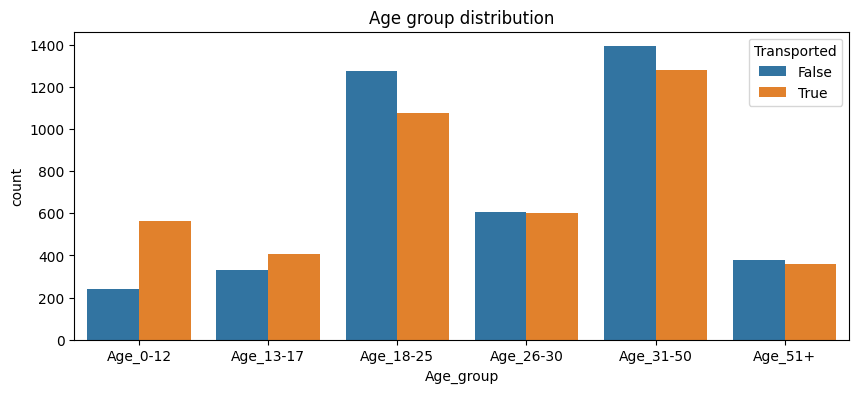

In [ ]:
dataset = df
dataset['Age_group']=np.nan
dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']='Age_13-17'
dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']='Age_18-25'
dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']='Age_26-30'
dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']='Age_31-50'
dataset.loc[dataset['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

In [ ]:
bins = [0,10,20,30,40,50,60,70,80]
df['age_group'] = pd.cut(df['Age'], bins)
df['age_group'].value_counts(normalize=True).sort_index()

age_group
(0, 10]     0.064779
(10, 20]    0.205974
(20, 30]    0.320058
(30, 40]    0.201536
(40, 50]    0.119242
(50, 60]    0.062020
(60, 70]    0.021953
(70, 80]    0.004439
Name: proportion, dtype: float64

## category data


Multiple 多類別
*   HomePlanet 母星
*   Destination 目的地

boolen 二元
*   CryoSleep 冷凍休眠
*   VIP 貴兵

### HomePlanet 母星

In [ ]:
df.HomePlanet.value_counts(normalize=True).round(2)

HomePlanet
Earth     0.54
Europa    0.25
Mars      0.21
Name: proportion, dtype: float64

### Destination 目的地

In [ ]:
df.Destination.value_counts(normalize=True).round(2)

Destination
TRAPPIST-1e      0.69
55 Cancri e      0.21
PSO J318.5-22    0.09
Name: proportion, dtype: float64

### CryoSleep 冷凍休眠

In [ ]:
df.CryoSleep.value_counts(normalize=True).round(2)

CryoSleep
False    0.64
True     0.36
Name: proportion, dtype: float64

### VIP

In [ ]:
df.VIP.value_counts(normalize=True).round(2)

VIP
False    0.98
True     0.02
Name: proportion, dtype: float64

## additional consumption


'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# fig, ax = plt.subplots(5,1,  figsize=(8, 10))
# plt.subplots_adjust(top = 2)   # 圖表上緣和邊匡間隔
# sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[0])
# sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1])
# sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2])
# sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3])
# sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4])

In [ ]:
exp_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['Expenditure']=df[exp_features].sum(axis=1)     # 花費加總
df['No_spending']=(df['Expenditure']==0).astype(int)  # 免費仔

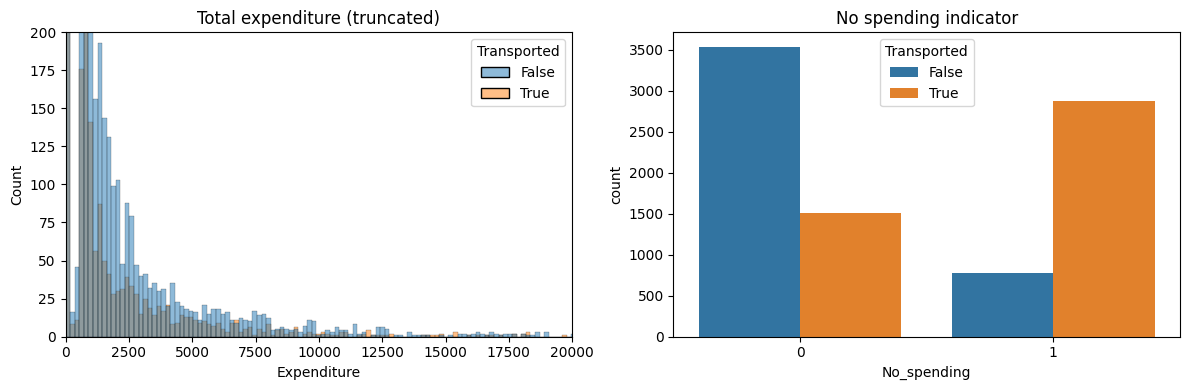

In [ ]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()